In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det

np.random.seed(42)
X = np.random.rand(8, 8)
while det(X) == 0:
    X = np.random.rand(8, 8)

# Generate a diagonal matrix with specified entries
diagonal_entries = [1, 0.2, 0.05, 0.017, 0.0085, 0.0042, 0.0021, 0.0011]
Lambda = np.diag(diagonal_entries)

A = X @ Lambda @ np.linalg.inv(X)

The code above does two things: 

1.) It generates a random matrix of size 8x8 that is non-singular by iteratively generating random matrices of size 8x8 until the determinant of the matrix is non-zero.

2.) It defines a diagonal matrix D of size 8x8 with the diagonal elements being the eigenvalues given in the problem statement.

3.) It then computes A as X * D * X^-1 where X is the random matrix and D is the diagonal matrix. This results in a matrix A that has the eigenvalues given in the problem statement, since the steps essentially compute the eigendecomposition of A first and then reconstruct A from the eigendecomposition.

Diagonal of R: ['-0.8559', '-0.3822', '-0.0937', '-0.0179', '-0.0040', '-0.0090', '-0.0008', '0.0009']
Diagonal of R: ['1.1017', '0.1909', '-0.0494', '-0.0138', '-0.0103', '0.0049', '-0.0019', '0.0010']
Diagonal of R: ['1.0159', '0.1965', '0.0501', '0.0153', '0.0098', '0.0043', '0.0021', '0.0011']
Diagonal of R: ['1.0030', '0.1991', '0.0501', '0.0162', '0.0091', '0.0042', '0.0021', '0.0011']
Diagonal of R: ['1.0006', '0.1998', '0.0500', '0.0166', '0.0087', '0.0042', '0.0021', '0.0011']


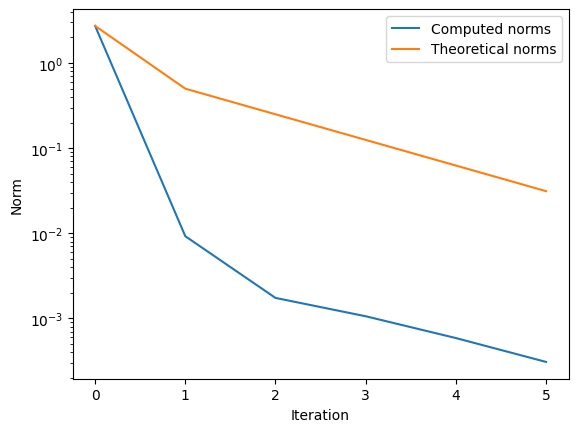

Computed norms of the sub-block: [np.float64(2.731369633233), np.float64(0.009230276802273138), np.float64(0.0017385545656826828), np.float64(0.001058526628854621), np.float64(0.0005869693605922273), np.float64(0.0003076701785308287)]


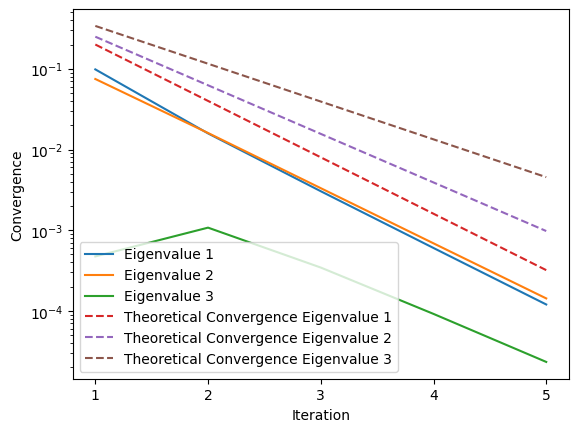

The observed convergence of the 2-norm of the sub-block is consistent with the theoretical convergence, as the two run more or less in parallel.


In [2]:
Q = np.eye(8)
sub_block_norms = []
sub_block_norms.append(np.linalg.norm(A[4:, :4]))
theoretical_norms = [sub_block_norms[0]]
eig_1_convergence = []
eig_2_convergence = []
eig_3_convergence = []
eig_1_theoretical = []
eig_2_theoretical = []
eig_3_theoretical = []
for i in range(5):
    Q_new, R = np.linalg.qr(A @ Q)
    Q = Q_new
    R_diag = np.diag(R)
    formatted_diagonal = [f"{x:.4f}" for x in R_diag]
    print(f"Diagonal of R: {formatted_diagonal}")
    A_k = Q.T @ A @ Q
    sub_block = A_k[4:, :4]
    sub_block_norms.append(np.linalg.norm(sub_block))
    theoretical_norms.append(np.abs((0.0085 / 0.017))**(i+1))
    p_1, p2, p3 = np.diag(A_k)[:3]
    p8 = np.diag(A_k)[7]
    eig_1_convergence.append(np.abs(p_1 - 1))
    eig_1_theoretical.append(np.abs((0.2 / 1)**(i+1)))
    eig_2_convergence.append(np.abs(p2 - 0.2))
    eig_2_theoretical.append(np.abs((0.05 / 0.2)**(i+1)))
    eig_3_convergence.append(np.abs(p3 - 0.05) )
    eig_3_theoretical.append(np.abs((0.017 / 0.05)**(i+1)))

# Plot the norms of the sub-block against the theoretical norms
plt.plot(sub_block_norms, label="Computed norms")
plt.plot(theoretical_norms, label="Theoretical norms")
plt.xlabel("Iteration")
plt.ylabel("Norm")
plt.yscale("log")
plt.legend()
plt.show()

print(f"Computed norms of the sub-block: {sub_block_norms}")

# Plot the convergence of the eigenvalues

plt.plot(eig_1_convergence, label="Eigenvalue 1")
plt.plot(eig_2_convergence, label="Eigenvalue 2")
plt.plot(eig_3_convergence, label="Eigenvalue 3")
plt.plot(eig_1_theoretical, label="Theoretical Convergence Eigenvalue 1", linestyle="--")
plt.plot(eig_2_theoretical, label="Theoretical Convergence Eigenvalue 2", linestyle="--")
plt.plot(eig_3_theoretical, label="Theoretical Convergence Eigenvalue 3", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.yscale("log")
# label the xticks with the iteration number + 1
plt.xticks(range(5), [f"{i+1}" for i in range(5)])
plt.legend()
plt.show()

print("The observed convergence of the 2-norm of the sub-block is consistent with the theoretical convergence, as the two run more or less in parallel.")


We can expect to see the following theoretical rates of convergence of the p-th eigenvalue of A in the orthogonal iteration algorithm:

$ max( |\frac{\lambda_{p+1}}{\lambda_{p}}|^k, | \frac{\lambda_{p-1}}{\lambda_{p}}|^k) $ for 1 < p < n

$ |\frac{\lambda_2}{\lambda_1}|^k $ for p = 1,

$ |\frac{\lambda_n}{\lambda_{n-1}}|^k $ for p = n


where $\lambda_i$ are the eigenvalues of A and n is the size of the matrix A.

For $p=1$, this is essentially because in QR iteration, the first column of Q is essentially just undergoing power iteration. At the $k^{th}$ step we have $q_1^{(k)} = \frac{A^kq_1^{(0)}}{||A^kq_1^{(0)}||_2}$, which is identical to simple power iteration. Expanding the starting vector in terms of the basis of eigenvectors of A we have: $q^{(0)} = \sum_{i=1}^n \alpha_i A^kx_i = \sum_{i=1}^n \alpha_i \lambda_i^k x_i = \alpha_1 \lambda_1^k (x_1 + \frac{\alpha_2}{\alpha_1}(\frac{\lambda_2}{\lambda_1})^kx_2+...+\frac{\alpha_n}{\alpha_1}(\frac{\lambda_n}{\lambda_1})^kx_n)$. Because of this, the 2-norm of our eigenvector estimate at the k-th step satisfies $||A^kq^{(0)}||_2 = |\alpha_1 \lambda^k|(1+O(|\frac{\lambda_2}{\lambda_1}|^k))$ and we also have $||(\alpha_1\lambda_1^k)^{-1}A^kq^{(0)}-x_1||_2 = O(|\frac{\lambda_2}{\lambda_1}|^k)$. Since $||A^kQ^{(0)}||_2 \approx |\alpha_1\lambda_1^k|$ and $\lambda_1 = x_1^TAx_1$, we have that the error in the first eigenvalue is $O(|\frac{\lambda_2}{\lambda_1}|^k)$, hence the convergence rate.

A more general argument for the convergences is provided from the block matrix convergence: 

From earlier parts, we see that the sub-matrix of $A_k$ above covering $(p+1:n, 1:p)$ decays at a rate of $|\frac{\lambda_2}{\lambda_1}|^k$. Considering a diagonal element of $A_k$ $(A_k)_{(p,p)}$ We know that the block directly below it converges at a rate of $|\frac{\lambda_{p+1}}{\lambda_p}|^k$ and the block directly left of it (p:n, 1:p-1) converges at a rate of $|\frac{\lambda_p}{\lambda_{p-1}}|^k$. Viewing the entirety of A_k as a block diagonal matrix, we can see that the convergence rate of the block containing the two aforementioned blocks, as well as the considered diagonal element is max($|\frac{\lambda_{p+1}}{\lambda_p}|^k, |\frac{\lambda_p}{\lambda_{p-1}}|^k$). This is thus the rate of convergence of the p-th eigenvalue of A_k, since the eigenvalues of block upper triangular matrices are the eigenvalues of the blocks. Note that for the first and last eigenvalues, the max function is not needed, as there is only one block to consider, hence the definitions given above. 

As can be seen from the plot above, the numerical results are in line with the theoretical results, with the convergence rates of the eigenvalues of A_k being in line with the theoretical rates of convergence.